## Demo 1: Solving LP problems graphically

$$
\begin{array}{lccl}
\min &x_1 & + \;\;\; x_2 & \\
\\
\text{s.t.} &2x_1 &+ \;\;\; 2x_2 & \geq 4 \\
& x_1 &              & \leq 3 \\
&     &  \;\;\; x_2  & \geq 1 \\
 &x_1 \geq 0, & x_2 \geq 0 
\end{array}
$$

In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()

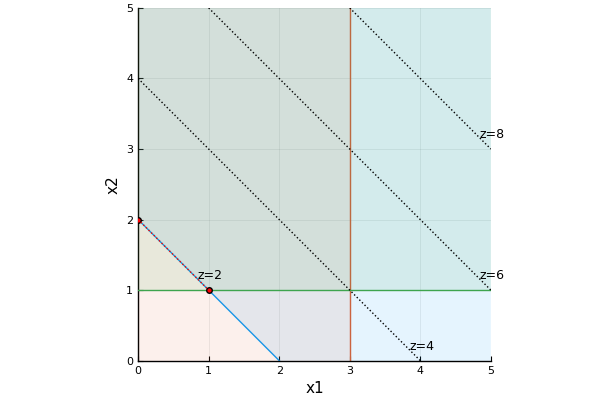

In [3]:
x1 = range(0,5,step=1)
x2 = range(0,5,step=1)

# 2x1 + 2x2 >= 4
plot(x1, (2 .- x1), # 2nd co-ord has to be function of first
    color = :1, 
    fill=(10,0.1), #  10 choosen to pick side of line to shade, (alpha=) 0.1 is transparency 
    legend=false, 
    xaxis = ("x1", (0,5)), # to include x1 >= 0
    yaxis = ("x2", (0,5)), # to include x2 >= 0
    aspect_ratio = :equal)  

# x1 <= 3
vline!([3], color = :2)
vspan!([0, 3], color=:2, alpha = 0.1) # work around as fill does not work for vline

#x2 >= 1 x1, 
hline!([1], color = :3, fill=(x2[end],0.1))

# the feasible region is where the shaded areas overlap, and we need to find the minimum in this region

# plot objective function
plot!([0,5], [4,-1], line = :dot, color = :black)
annotate!([(4.2, 0.2, text("z=4", 9,:right))])
plot!([1,5], [5,1], line = :dot, color = :black)
annotate!([(5.2, 1.2, text("z=6", 9,:right))])
plot!([3,5], [5,3], line = :dot, color = :black)
annotate!([(5.2, 3.2, text("z=8", 9,:right))])

# optimal solutions
# as (0,2) and (1,1) have the same objective value (=2) and on the same contour line
# meaning this problem has multiple optimal solutions - all x1 and x2 values between the two red points
scatter!([0],[2], color = :red)
scatter!([1],[1], color = :red)
plot!([0,1], [2,1], line = :dot, color = :red)
annotate!([(1.2, 1.2, text("z=2", 9,:right))])

# savefig("ex2_demo1.pdf")

## Problem 1a

$$
\begin{array}{lccl}
\max. &8x_1 & + \;\;\; 3x_2 & \\
\\
\text{s.t.} &3x_1 &+ \;\;\; 8x_2 & \leq 48 \\
	 &4x_1 &+ \;\;\; 3x_2 & \leq 21 \\
	 &x_1  &- \;\;\; 2x_2 & \leq 1 \\
	 &x_1 \geq 0, & x_2 \geq 0 
\end{array}  
$$


In [52]:
using JuMP, Cbc #modelling language and solver

P1a = Model(with_optimizer(Cbc.Optimizer,logLevel = 0)) #creates the model, select the solver  

@variable(P1a, x[1:2] >= 0) # creates the non-negative variables x1 and x2

@constraint(P1a, 3*x[1] + 8*x[2] <= 48) # constraint 1
@constraint(P1a, 4*x[1] + 3*x[2] <= 21) # constraint 2
@constraint(P1a, x[1] - 2*x[2] <= 1) # constraint 3

@objective(P1a, Max, 8*x[1]+3x[2]) # declare the objective function

optimize!(P1a) # solve the optimisation problem

#Printing out the solution
x_value = value.(x)
print("Optimal values: $(x_value),\nOptimal objective: $(objective_value(P1a))\n")


Optimal values: [4.09091, 1.54545],
Optimal objective: 37.36363636363636


## Problem 1b

$$
  \begin{array}{lccll}
\min. &6x_1 & + \;\;\; 5x_2 
\\
\text{s.t.} &3x_1 & + \;\;\; 5x_2 & \geq 15 \\
	 &7x_1 & + \;\;\; 2x_2 & \leq 14 \\
	 &-x_1 & + \;\;\; 3x_2 & \leq  9 \\
	 &x_1 \geq 0, & x_2 \geq 0
\end{array} 
$$

In [53]:
P1b = Model(with_optimizer(Cbc.Optimizer,logLevel = 0)) #creates the model, select the solver  

@variable(P1b, x[1:2] >= 0) # creates the non-negative variables x1 and x2

@constraint(P1b, 3*x[1] + 5*x[2] >= 15) # constraint 1
@constraint(P1b, 7*x[1] + 2*x[2] <= 14) # constraint 2
@constraint(P1b, -x[1] + 3*x[2] <= 9) # constraint 3

@objective(P1b, Min, 6*x[1]+5x[2]) # declare the objective function

optimize!(P1b) # solve the optimisation problem

#Printing out the solution
x_value = value.(x)
print("Optimal values: $(x_value),\nOptimal objective: $(objective_value(P1b))\n")


Optimal values: [0.0, 3.0],
Optimal objective: 15.0


## Problem 2

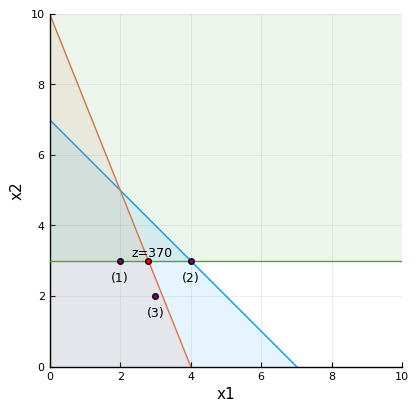

In [29]:
x1 = range(0,10,step=5)
x2 = range(0,10,step=5)

# x1 + x2 <= 7
plot(x1, (7 .- x1), # 2nd co-ord has to be function of first
    color = :1, #blue
    fill=(-10,0.1), #  -10 choosen to pick side of line to shade, (alpha=) 0.1 is transparency 
    legend=false, 
    xaxis = ("x1", (0,10)), # to include x1 >= 0
    yaxis = ("x2", (0,10)), # to include x2 >= 0
    aspect_ratio = :equal)  

# 10x1 + 4x2 <= 40
plot!(x1, (10 .- (10/4)*x1), # 2nd co-ord has to be function of first
    color = :2, #orange
    fill=(-10,0.1)) #  -10 choosen to pick side of line to shade, (alpha=) 0.1 is transparency   

# 10x2 >= 30 
hline!([3], color = :3, fill=(x2[end],0.1)) #green

# the feasible region is where the shaded areas overlap, and we need to find the minimum in this region

# # plot objective function
# plot!([0,5], [4,-1], line = :dot, color = :black)
# annotate!([(4.2, 0.2, text("z=4", 9,:right))])
# plot!([1,5], [5,1], line = :dot, color = :black)
# annotate!([(5.2, 1.2, text("z=6", 9,:right))])
# plot!([3,5], [5,3], line = :dot, color = :black)
# annotate!([(5.2, 3.2, text("z=8", 9,:right))])

# optimal solution
scatter!([2.8],[3], color = :red)
annotate!([(3.5, 3.2, text("z=370", 9,:right))])

# feasible region question
scatter!([2],[3], color = :purple)
annotate!([(2, 2.5, text("(1)", 9,:down))])

scatter!([4],[3], color = :purple)
annotate!([(4, 2.5, text("(2)", 9,:down))])

scatter!([3],[2], color = :purple)
annotate!([(3, 1.5, text("(3)", 9,:down))])

savefig("ex2_p2.pdf")